In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from utils import functions as f

import os
import cv2
import math       
import pyaudio 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, f1_score

In [267]:
#Load the X_train, X_test, y_train, y_test

with open('./Pickle Files/Train Test Split/X_train', 'rb') as Xtrain_picle_in:
    X_train = pickle.load(Xtrain_picle_in)

with open('./Pickle Files/Train Test Split/X_test', 'rb') as Xtest_picle_in:
    X_test = pickle.load(Xtest_picle_in)
    
with open('./Pickle Files/Train Test Split/y_train', 'rb') as ytrain_picle_in:
    y_train = pickle.load(ytrain_picle_in)

with open('./Pickle Files/Train Test Split/y_test', 'rb') as ytest_picle_in:
    y_test = pickle.load(ytest_picle_in)

In [3]:
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(128, activation = 'relu'))

model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'bce', optimizer = 'Adam', metrics = ['acc'])

In [4]:
history3 = model3.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     batch_size = 64,
                     epochs = 10)

Epoch 1/10
81/81 [==============================] - 259s 3s/step - loss: 0.5073 - acc: 0.7329 - val_loss: 0.3364 - val_acc: 0.9035
Epoch 2/10
81/81 [==============================] - 231s 3s/step - loss: 0.2516 - acc: 0.9097 - val_loss: 0.2486 - val_acc: 0.9023
Epoch 3/10
81/81 [==============================] - 222s 3s/step - loss: 0.1672 - acc: 0.9497 - val_loss: 0.1901 - val_acc: 0.9433
Epoch 4/10
81/81 [==============================] - 222s 3s/step - loss: 0.1339 - acc: 0.9628 - val_loss: 0.1416 - val_acc: 0.9585
Epoch 5/10
81/81 [==============================] - 224s 3s/step - loss: 0.1061 - acc: 0.9700 - val_loss: 0.1218 - val_acc: 0.9608
Epoch 6/10
81/81 [==============================] - 218s 3s/step - loss: 0.0835 - acc: 0.9782 - val_loss: 0.0981 - val_acc: 0.9719
Epoch 7/10
81/81 [==============================] - 218s 3s/step - loss: 0.0831 - acc: 0.9747 - val_loss: 0.0815 - val_acc: 0.9725
Epoch 8/10
81/81 [==============================] - 222s 3s/step - loss: 0.0667 - a

In [6]:
model3.evaluate(X_test, y_test)

54/54 [==============================] - 25s 454ms/step - loss: 0.0642 - acc: 0.9789


[0.0642189309000969, 0.9789473414421082]

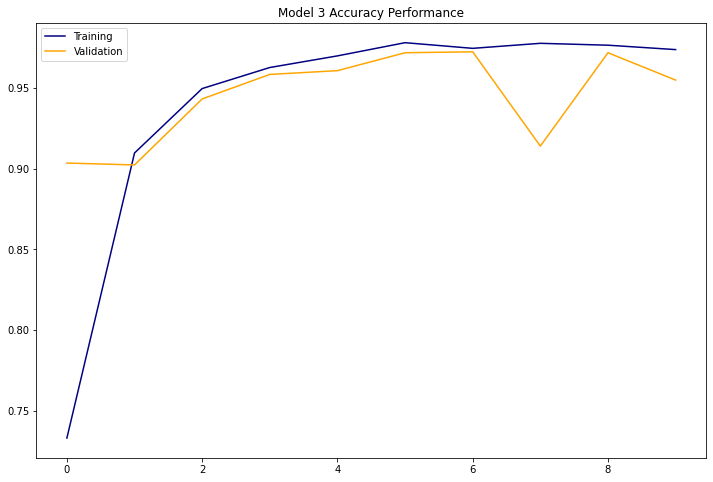

In [5]:
plt.figure(figsize = (12, 8))
plt.title('Model 3 Accuracy Performance')
plt.plot(history3.history['acc'], label = 'Training', color = 'navy')
plt.plot(history3.history['val_acc'], label = 'Validation', color = 'orange')
plt.legend();
plt.savefig('./Project Figs/model3.accuracy_perf.jpg')

In [24]:
#Save Model

model3.save('./Saved Models/Model3.h5')

In [268]:
#Load Model

model3 = tf.keras.models.load_model('./Saved Models/Model3.h5')

In [269]:
#Create predictions for model 3
model3_predictions = model3.predict(X_test)

In [270]:
#Assing every prediction greater or equal to 0.5 with 1 otherwise 0
model3_predictions = [1 if x >= 0.5 else 0 for x in model3_predictions]

In [271]:
#Check the recall score
print(f'Recall Score for Model 3 is: {recall_score(y_test, model3_predictions)}')

Recall Score for Model 3 is: 0.9895470383275261


In [272]:
#Check the f1 score
print(f'F1 Score for Model 3 is: {f1_score(y_test, model3_predictions)}')

F1 Score for Model 3 is: 0.979310344827586


In [273]:
#Create the confusion matrix
conf_matrix3 = confusion_matrix(y_test, model3_predictions)
conf_matrix3

array([[822,  27],
       [  9, 852]], dtype=int64)

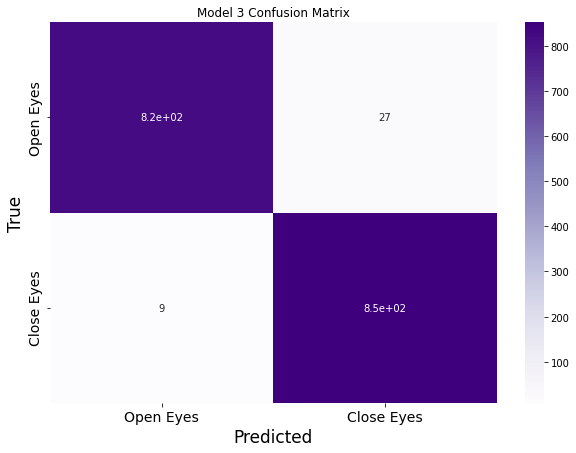

In [274]:
#Plot the confusion matrix
plt.figure(figsize=(10,7))
fig = sns.heatmap(conf_matrix3, annot = True, cmap = 'Purples')
fig.xaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.yaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.set_xlabel("Predicted",size=17)
fig.set_ylabel("True",size=17)
plt.title('Model 3 Confusion Matrix')
plt.savefig('./Project Figs/model3_conf_matrix.jpg')
plt.show();

Model Score: 0.0002828240394592285


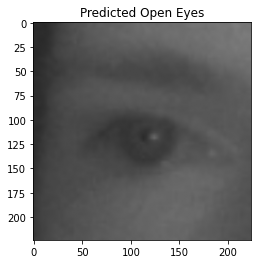

Model Score: 0.672947108745575


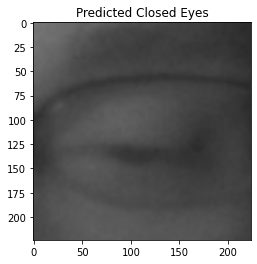

Model Score: 0.9709742069244385


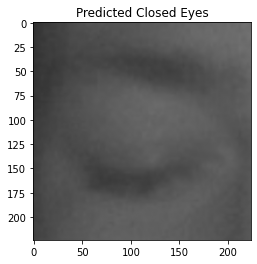

Model Score: 0.9983630776405334


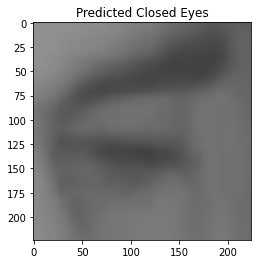

Model Score: 0.9960544109344482


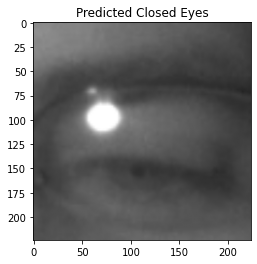

Model Score: 0.16698288917541504


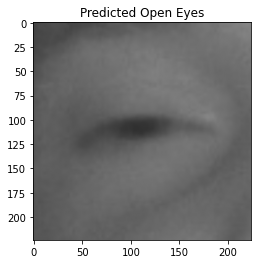

Model Score: 0.3472124934196472


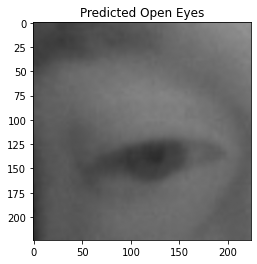

Model Score: 0.0028998255729675293


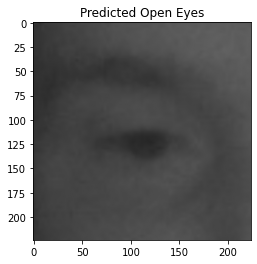

Model Score: 0.9925650358200073


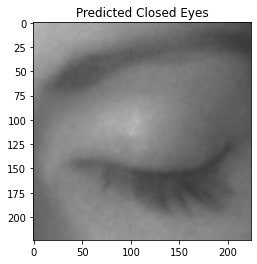

Model Score: 0.01631799340248108


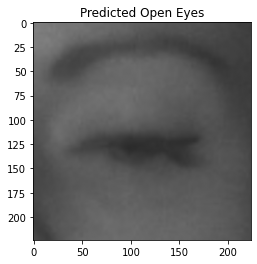

Model Score: 0.022916823625564575


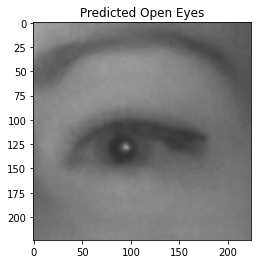

Model Score: 0.9901787042617798


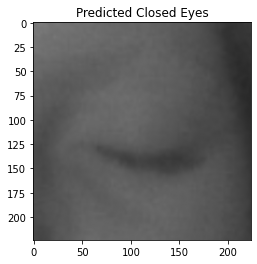

Model Score: 0.7780975103378296


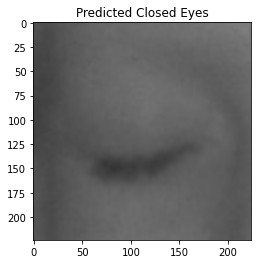

In [116]:
f.plot_prediction(model3)

### Model 4 

In [4]:
#Create the model number 4 with more CNN layers
model4 = Sequential()

model4.add(Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=16, kernel_size = (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation = 'relu'))
model4.add(Dense(128, activation = 'relu'))

model4.add(Dense(1, activation = 'sigmoid'))

early_stop = EarlyStopping(patience=5)

model4.compile(loss = 'bce', optimizer = 'Adam', metrics = ['acc'])

In [5]:
#Fit the model 4 on more epochs
history4 = model4.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     batch_size = 64,
                     epochs = 50
                     callbacks = early_stop)

Epoch 1/50
81/81 [==============================] - 245s 3s/step - loss: 0.5103 - acc: 0.7345 - val_loss: 0.3072 - val_acc: 0.8982
Epoch 2/50
81/81 [==============================] - 233s 3s/step - loss: 0.2291 - acc: 0.9279 - val_loss: 0.2336 - val_acc: 0.9298
Epoch 3/50
81/81 [==============================] - 222s 3s/step - loss: 0.1426 - acc: 0.9561 - val_loss: 0.1228 - val_acc: 0.9596
Epoch 4/50
81/81 [==============================] - 226s 3s/step - loss: 0.0875 - acc: 0.9733 - val_loss: 0.1170 - val_acc: 0.9632
Epoch 5/50
81/81 [==============================] - 225s 3s/step - loss: 0.0778 - acc: 0.9733 - val_loss: 0.0712 - val_acc: 0.9772
Epoch 6/50
81/81 [==============================] - 222s 3s/step - loss: 0.0609 - acc: 0.9813 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 7/50
81/81 [==============================] - 224s 3s/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0454 - val_acc: 0.9830
Epoch 8/50
81/81 [==============================] - 225s 3s/step - loss: 0.0395 - a

In [58]:
#Save the model
model4.save('./Saved Models/Model4.h5')

In [3]:
#Load the model
model4 = tf.keras.models.load_model('./Saved Models/Model4.h5')

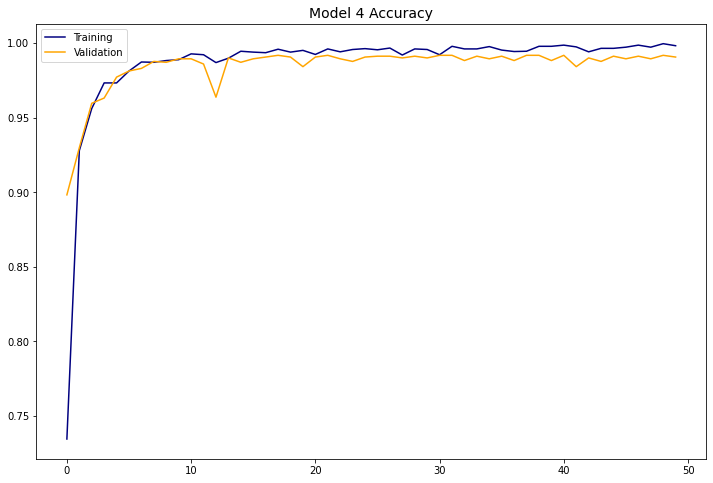

In [10]:
#Plot the model 4 accuracy performance
plt.figure(figsize = (12, 8))
plt.title('Model 4 Accuracy', fontsize = 14)
plt.plot(history4.history['acc'], label = 'Training', color = 'navy')
plt.plot(history4.history['val_acc'], label = 'Validation', color = 'orange')
plt.legend();

In [275]:
#Create the predictions for model 4
model4_predictions = model4.predict(X_test)

In [276]:
#Assing every prediction greater or equal to 0.5 with 1 otherwise 0
model4_predictions = [1 if x >= 0.5 else 0 for x in model4_predictions]

In [277]:
#Check the recall score
print(f'Recall Score for Model 4 is: {recall_score(y_test, model4_predictions)}')

Recall Score for Model 4 is: 0.9883855981416957


In [279]:
#Check the f1 score
print(f'F1 Score for Model 4 is: {f1_score(y_test, model4_predictions)}')

F1 Score for Model 4 is: 0.9906868451688009


In [280]:
#Create the confusion matrix
conf_matrix4 = confusion_matrix(y_test, model4_predictions)
conf_matrix4

array([[843,   6],
       [ 10, 851]], dtype=int64)

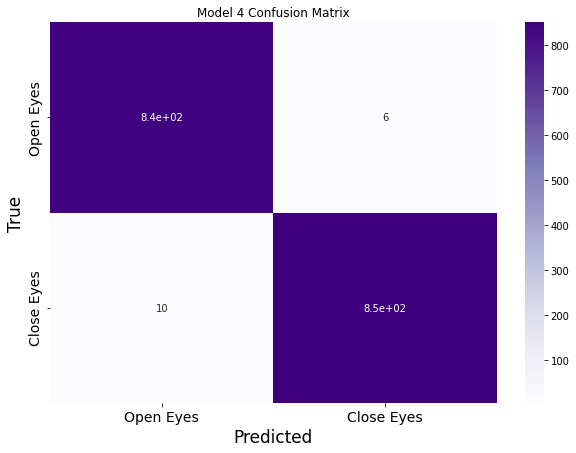

In [281]:
#Plot the confusion matrix
plt.figure(figsize=(10,7))
fig = sns.heatmap(conf_matrix4, annot = True, cmap = 'Purples')
fig.xaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.yaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.set_xlabel("Predicted",size=17)
fig.set_ylabel("True",size=17)
plt.title('Model 4 Confusion Matrix')
plt.savefig('./Project Figs/model4_conf_matrix.jpg')
plt.show();

#### Getting the eyes from random images

In [4]:
#Using the haar cascade. xml link was found in haarcascade github(#https://github.com/opencv/opencv/tree/master/data/haarcascades)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [7]:
#Create a funtion to crop the eyes
def get_eyes(path):
    img = []
    image = cv2.imread(path)
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for x, y, w, h  in faces:
        face_gray = gray_img[y: y+h, x: x+w]
        face_color = image[y: y+h, x: x+w]
        eyes = eyes_cascade.detectMultiScale(face_gray)
        if len(eyes) < 2:
            print('Eyes not detected')
        else:
            for ex, ey, ew, eh in eyes:
                eyes_color = face_color[ey: ey+eh, ex: ex+ew]
                img.append(cv2.resize(eyes_color, (224, 224)))
    img_array = np.array(img)
    return img_array

In [8]:
#Create a funtion to make prediction on different images
def get_prediction(image):
    path = 'D:/General_Assembly/projetcs/Capstone Project/Validation Image/' + image +'.jpg'
    img = get_eyes(path)
    img = img/255.0
    try:
        prediction = sum(model4.predict(img))/img.shape[0]
        if prediction >= 0.5:
            print(f'Model Predict Close Eyes (score: {prediction[0]})')
            original_img = cv2.imread(path)
            plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        else:
            print(f'Model Predict Open Eyes (score: {prediction[0]})')
            original_img = cv2.imread(path)
            plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    except:
        pass

Model Predict Close Eyes (score: 0.7810389399528503)


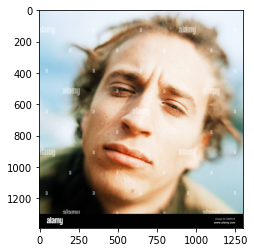

In [9]:
get_prediction('first_img')

Model Predict Close Eyes (score: 0.6666666865348816)


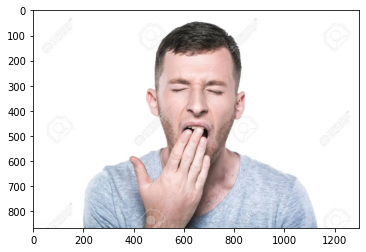

In [10]:
get_prediction('second_img')

Model Predict Open Eyes (score: 0.4999900162220001)


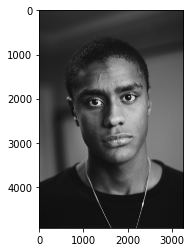

In [11]:
get_prediction('human_n')

Model Predict Open Eyes (score: 2.1726866725017835e-13)


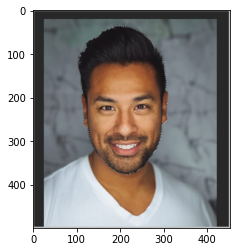

In [12]:
get_prediction('How to Brighten a Part of Your Image in_yyth')

### Video Demo

In [ ]:
#Create a video Demo
video = cv2.VideoCapture(0)

while True:
    ret, image = video.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    eyes = eyes_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        img_gray = gray[y: y+h, x: x+w]
        img_color = image[y: y+h, x: x+w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyes_cascade.detectMultiScale(img_gray)
        if len(eyess) < 1:
            print('Eyes not detected')

        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_color = img_color[ey: ey+eh, ex: ex+ew]
                
    final_image = cv2.resize(eyes_color, (224, 224))
    final_image = np.array(final_image).reshape(-1, 224, 224, 3)
    final_image = final_image / 255.0
    
    prediction = model4.predict(final_image)
    if prediction > 0.5:
        status = 'Drowsy Driver'
    else:
        status = 'Active Driver'
    
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print(face_cascade.empty())
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for x, y, w, h in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
            
    cv2.putText(image, status, (100, 70),font, 3, (255, 255, 0), 2, cv2.LINE_8)
    cv2.imshow('Drowsiness Detection', image)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break